In [68]:
# PCA examples
# Example 1
#########################################################################################################

C:\Users\46541\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


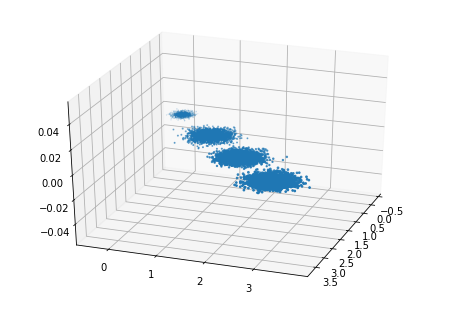

In [62]:
# https://github.com/ljpzzz/machinelearning/blob/master/classic-machine-learning/pca.ipynb
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本3个特征，共4个簇
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], 
                  random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')
plt.show()

In [ ]:
'''
有两个PCA类的成员值得关注。
1. 第一个是explained_variance_，它代表降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分。
2. 第二个是explained_variance_ratio_，它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。
'''

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
print ("Propotion of each principal component accounts for the total variance", pca.explained_variance_ratio_)
print ("The variance of each principal component after dimensionality reduction", pca.explained_variance_)

Propotion of each principal component accounts for the total variance [0.98318212 0.00850037 0.00831751]
The variance of each principal component after dimensionality reduction [3.78521638 0.03272613 0.03202212]


[0.98318212 0.00850037]
[3.78521638 0.03272613]


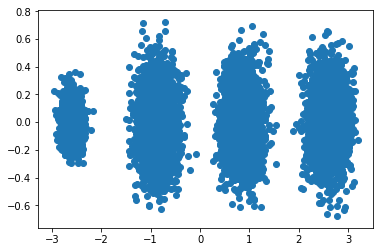

In [89]:
# without whiten
pca = PCA(n_components=2)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
X_new_1 = pca.transform(X)
plt.scatter(X_new_1[:, 0], X_new_1[:, 1],marker='o')
plt.show()

In [90]:
X_new_1

array([[ 1.29049617,  0.01162118],
       [-2.5902227 , -0.04141849],
       [ 2.81225258, -0.05286925],
       ...,
       [ 2.52492314, -0.0935418 ],
       [ 2.98206456,  0.03861322],
       [ 2.28089246, -0.13618233]])

[0.98318212 0.00850037]
[3.78521638 0.03272613]


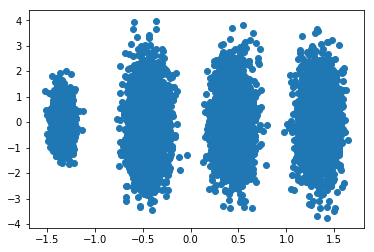

In [91]:
# with whiten
pca_2 = PCA(n_components=2, whiten=True)
pca_2.fit(X)
print (pca_2.explained_variance_ratio_)
print (pca_2.explained_variance_)
X_new_2 = pca_2.transform(X)
plt.scatter(X_new_2[:, 0], X_new_2[:, 1],marker='o')
plt.show()

In [92]:
X_new_2

array([[ 0.66330209,  0.06423964],
       [-1.33134849, -0.22895333],
       [ 1.44546962, -0.29225087],
       ...,
       [ 1.29778517, -0.51708081],
       [ 1.53275127,  0.21344632],
       [ 1.17235585, -0.7527893 ]])

#### when n_components $\in$ [0,1], it represents the threshold that the sum of variance of  the designated principal components account for and let PCA decide the number of dimensions to be reduced according to the sample feature variance

In [71]:
pca = PCA(n_components=0.95)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print ("The remaining number of principal component:" ,pca.n_components_)

[0.98318212]
[3.78521638]
The remaining number of principal component: 1


In [79]:
pca = PCA(n_components=0.99)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)

[0.98318212 0.00850037]
[3.78521638 0.03272613]
2


In [75]:
pca = PCA(n_components='mle', svd_solver='full')
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)

[0.98318212]
[3.78521638]
1


In [ ]:
#########################################################################################################

In [124]:
# Example 2

In [125]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imshow
from sklearn.decomposition import PCA

In [126]:
# load dataset.
faces_image = np.load('olivetti_faces.npy')

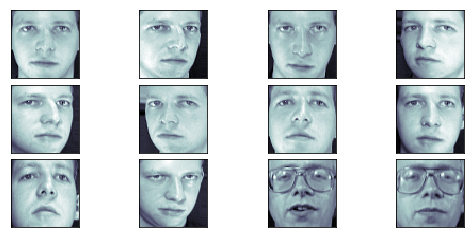

In [127]:
# show dataset.
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_image[i], cmap='bone')

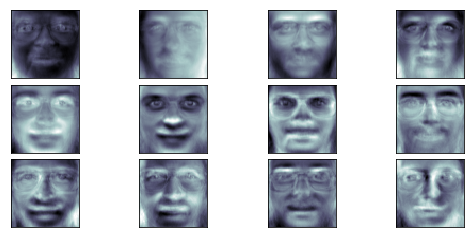

In [129]:
# use PCA to do face dimensionality reduction.

def face_pca(faces, n_components = 150):
    '''
    利用 sklearn 的 PCA 进行图像降维
    faces: 人脸数据集，faces[i] 为一张 64*64 的图片
    n_components: 选择多少个主成分
    return: pca以后的人脸数据，特征脸
    '''
    faces_data = faces.reshape(faces.shape[0], faces.shape[1]*faces.shape[2])
    pca = PCA(n_components = n_components).fit(faces_data)
    
    return pca.transform(faces_data), pca.components_.reshape((n_components, faces.shape[1], faces.shape[2]))


faces_pca, eigen_faces = face_pca(faces_image, n_components=150)

# Show eigen faces
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigen_faces[i], cmap='bone')

In [134]:
from sklearn.cluster import KMeans
cluster_num = 40
kmeans_model = KMeans(n_clusters=cluster_num, random_state=9)
labels = kmeans_model.fit_predict(faces_pca)

C:\Users\46541\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


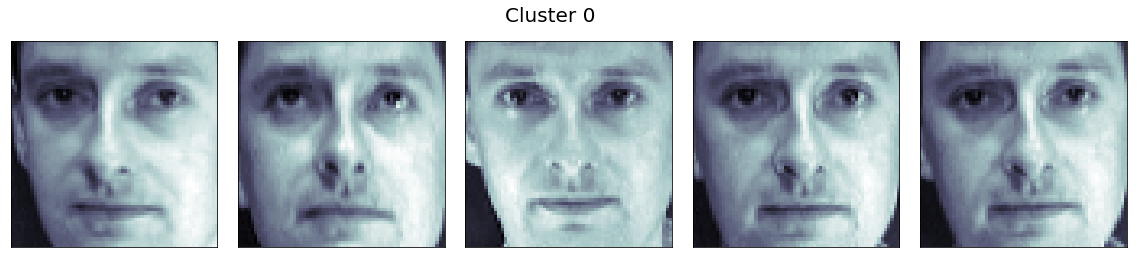

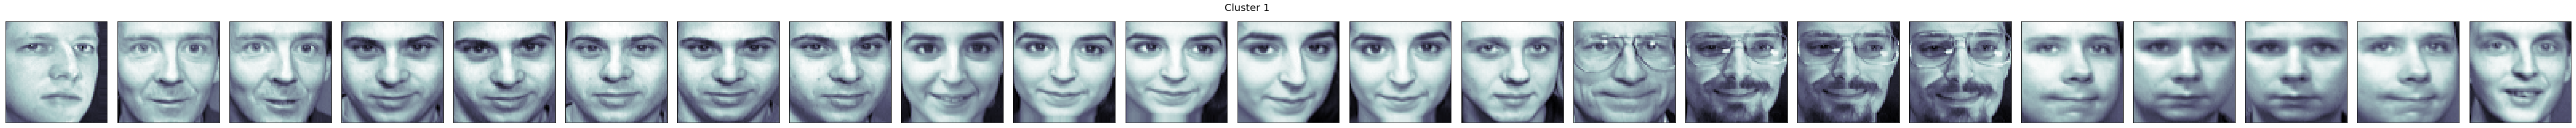

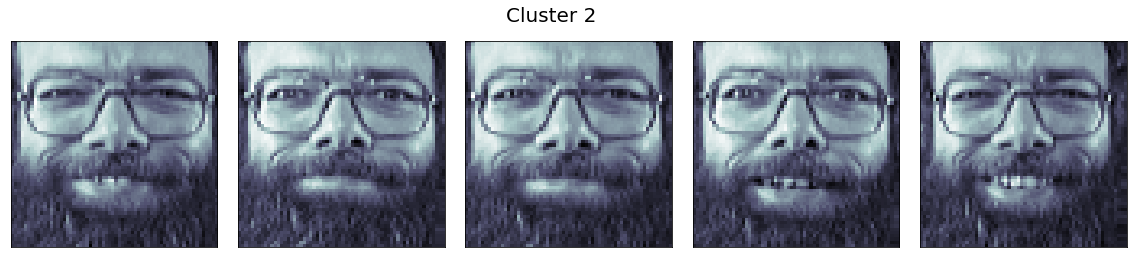

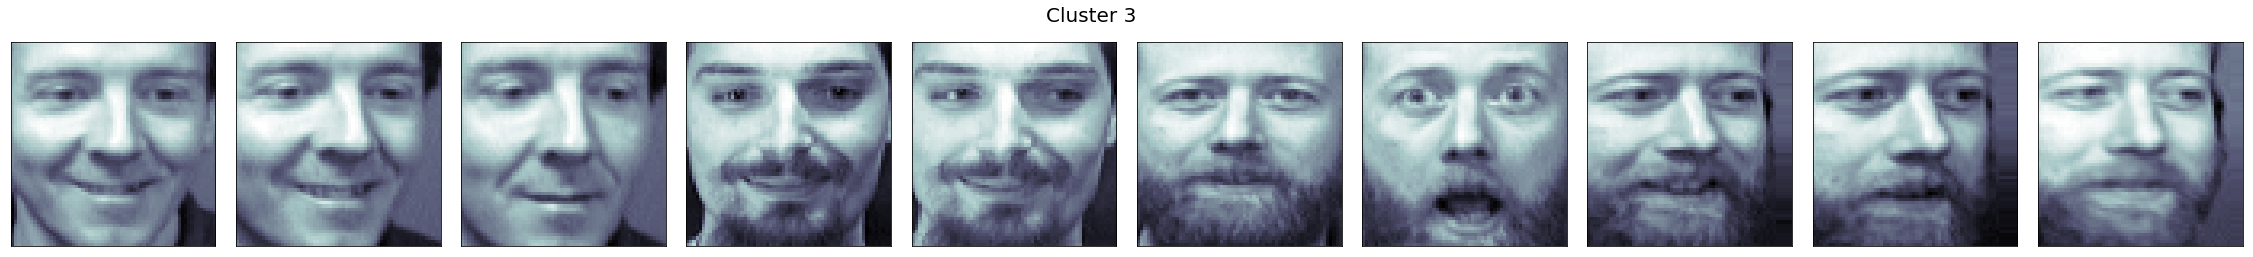

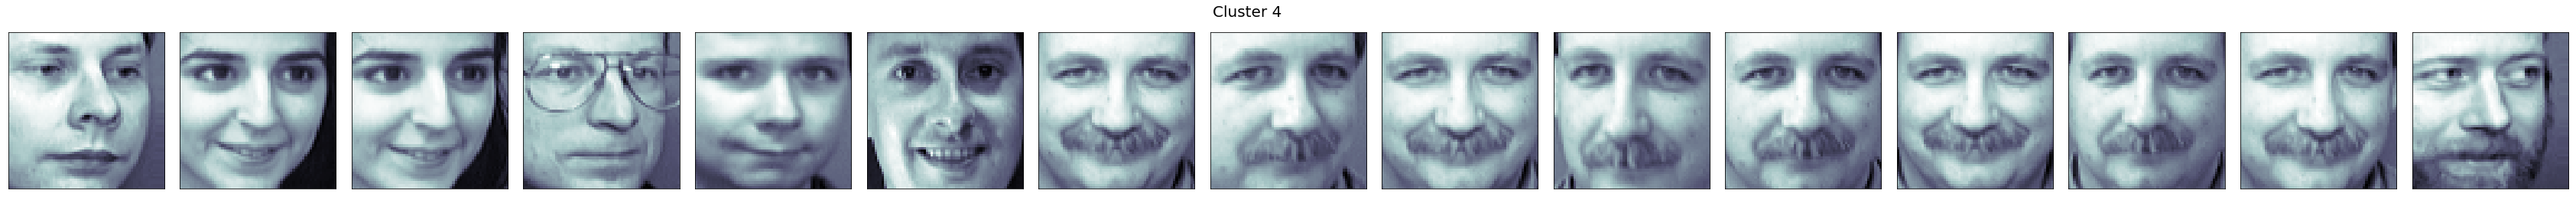

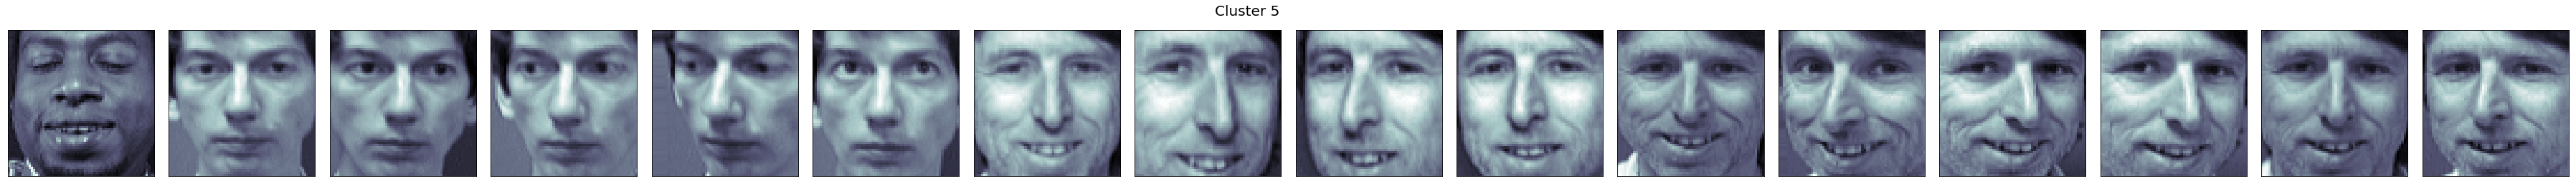

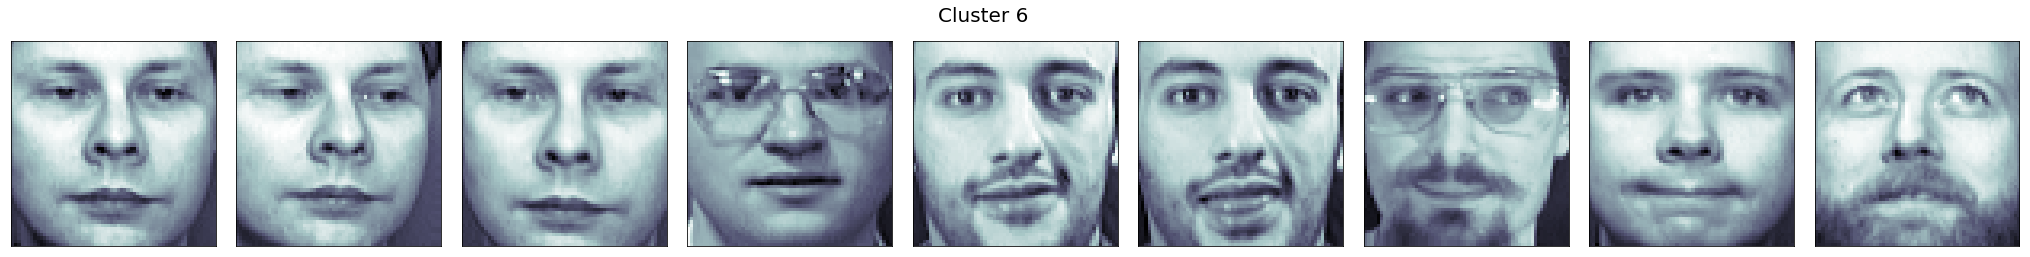

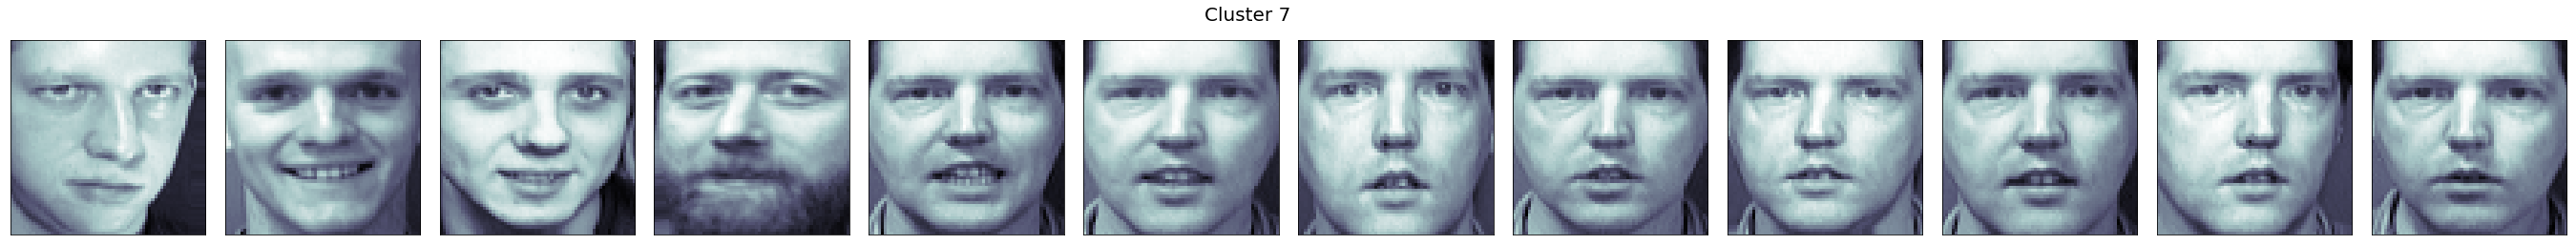

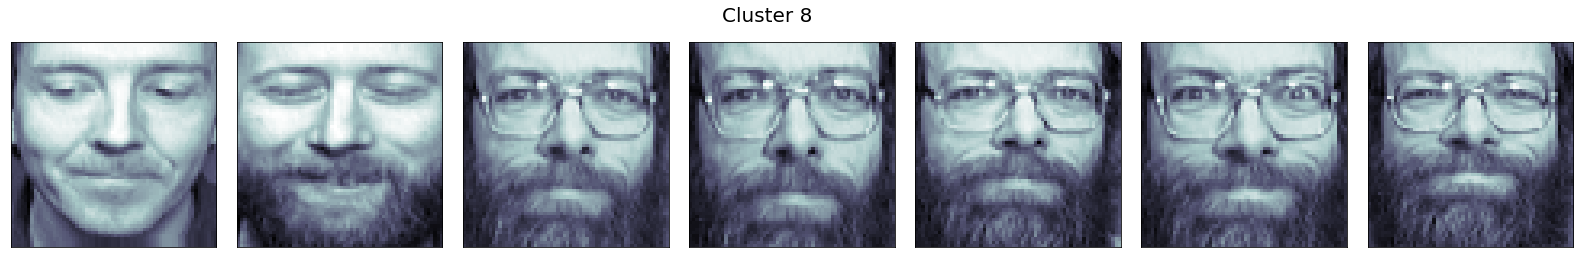

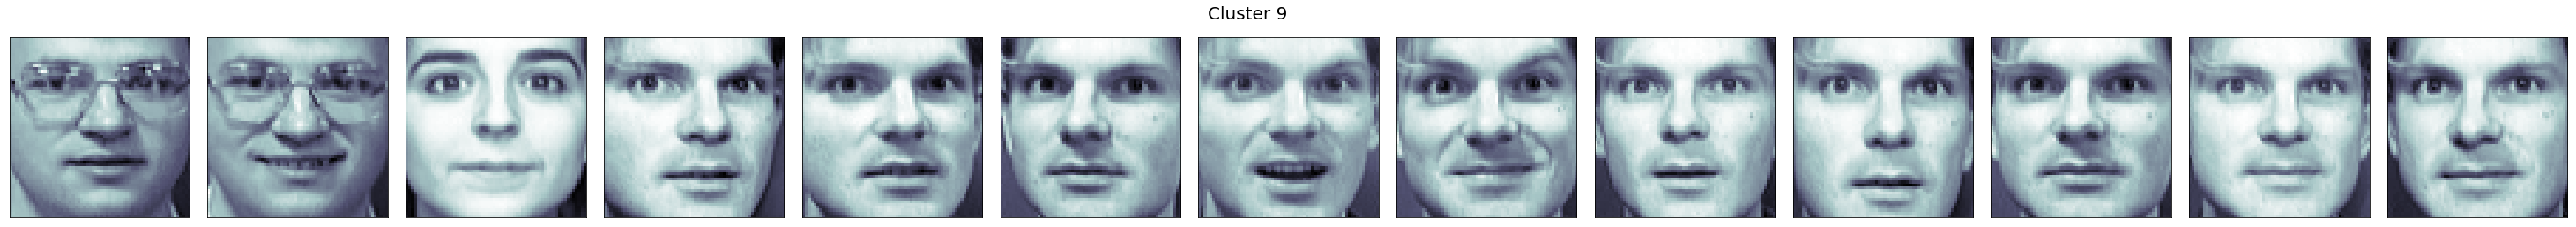

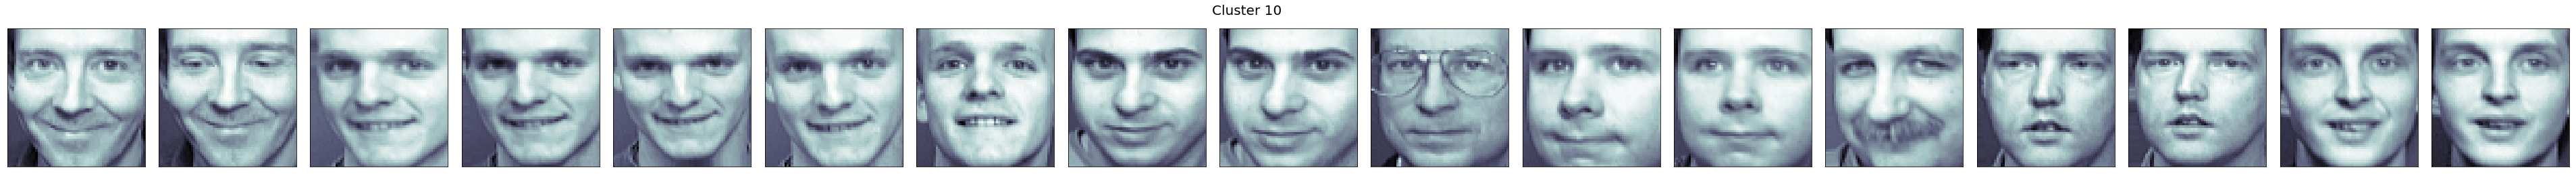

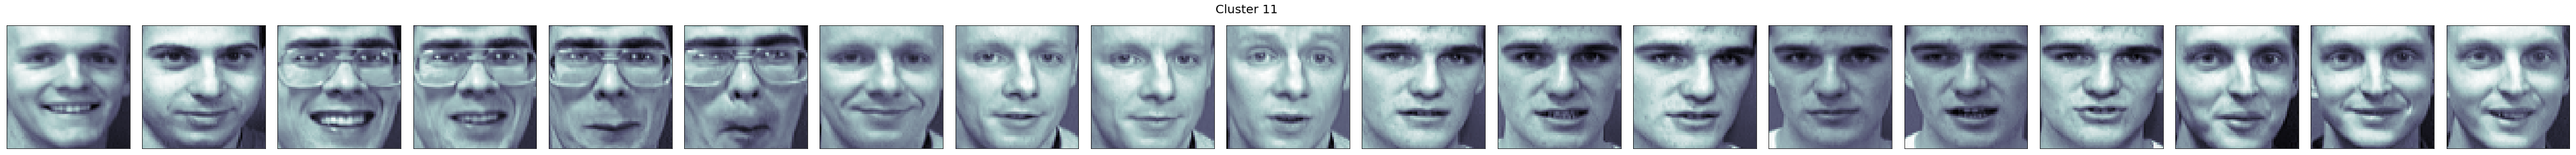

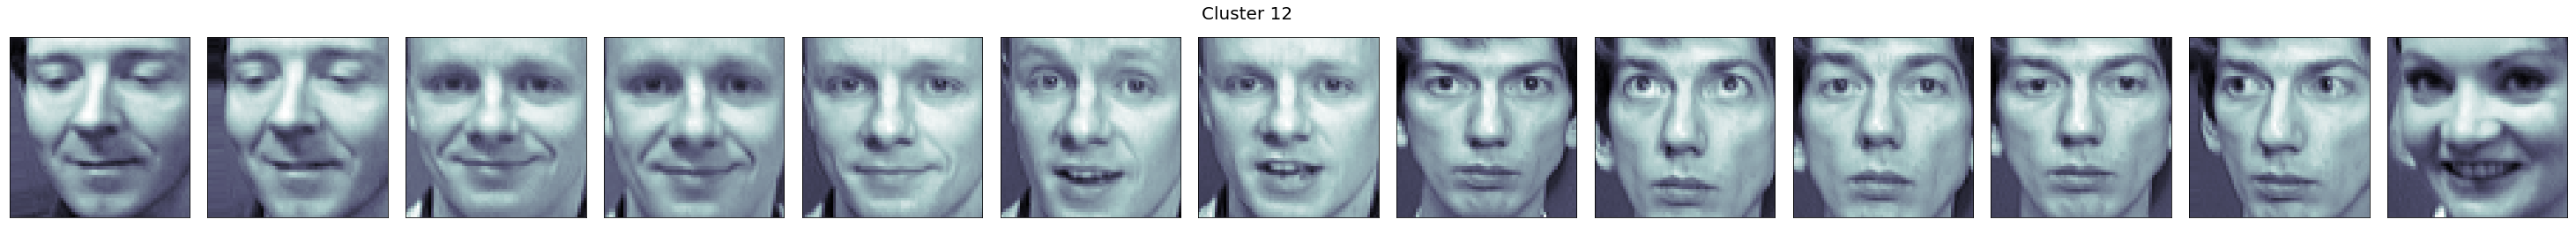

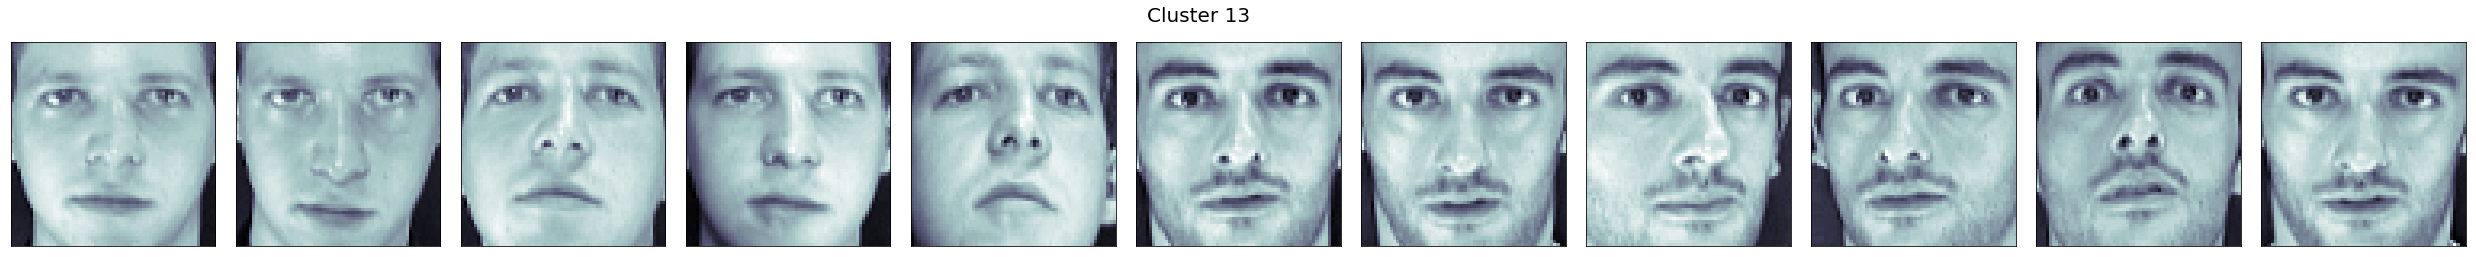

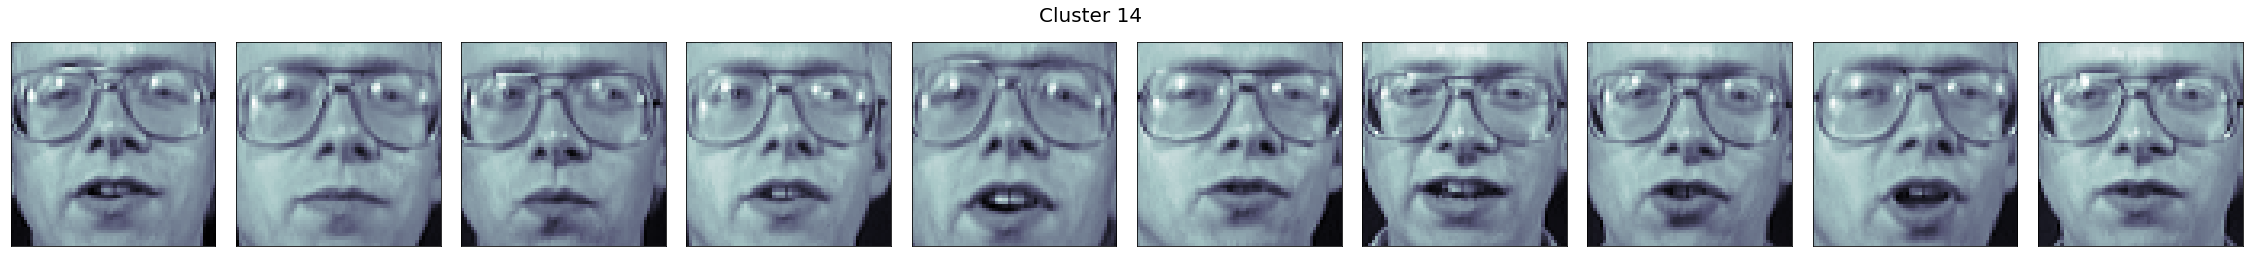

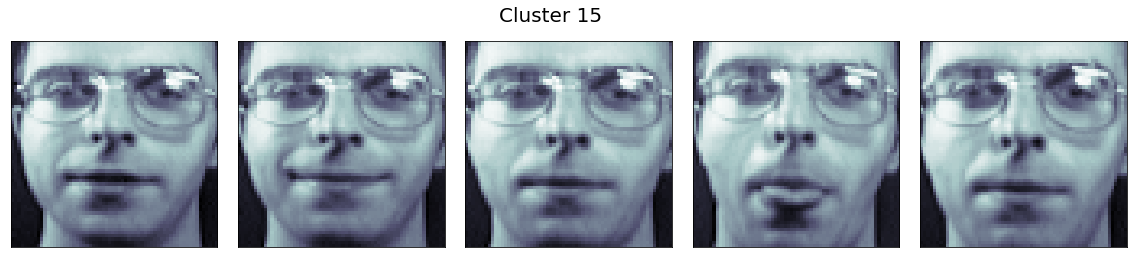

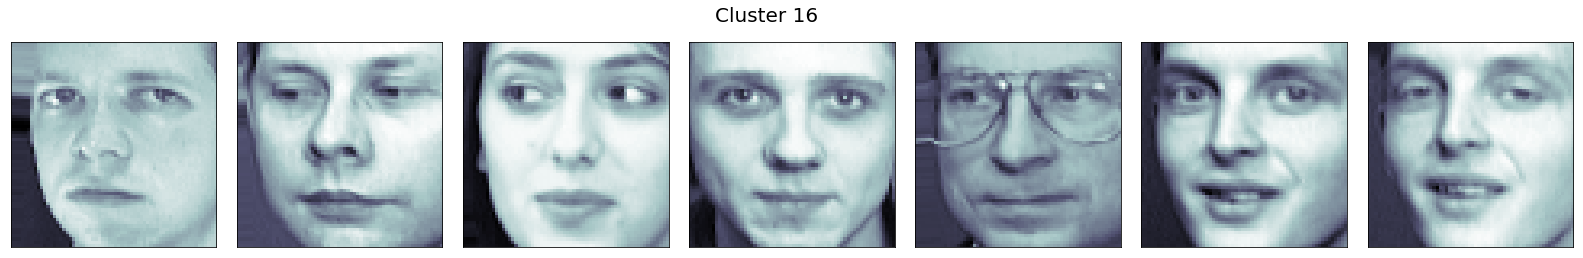

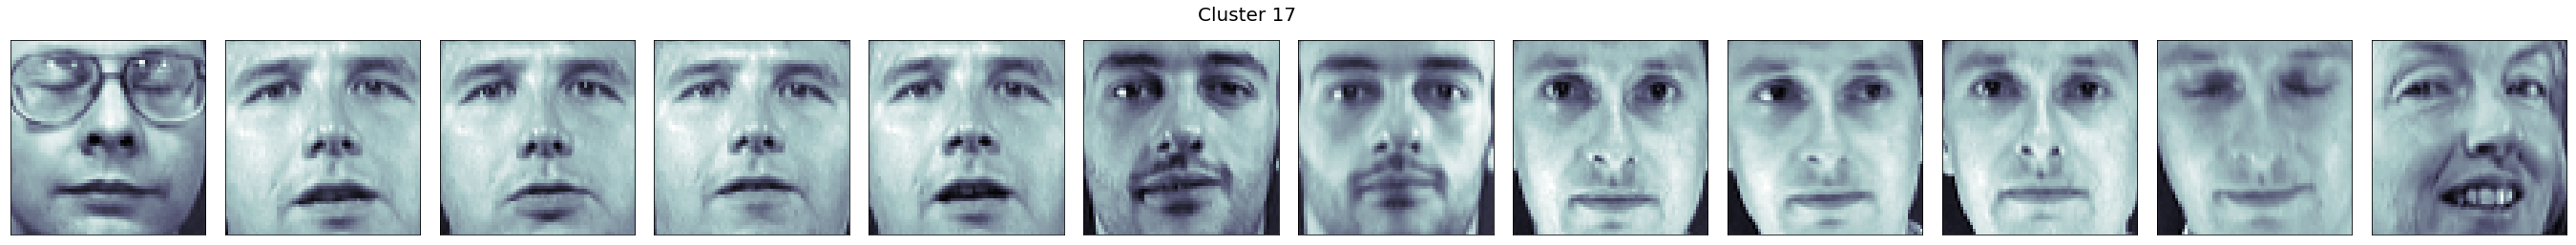

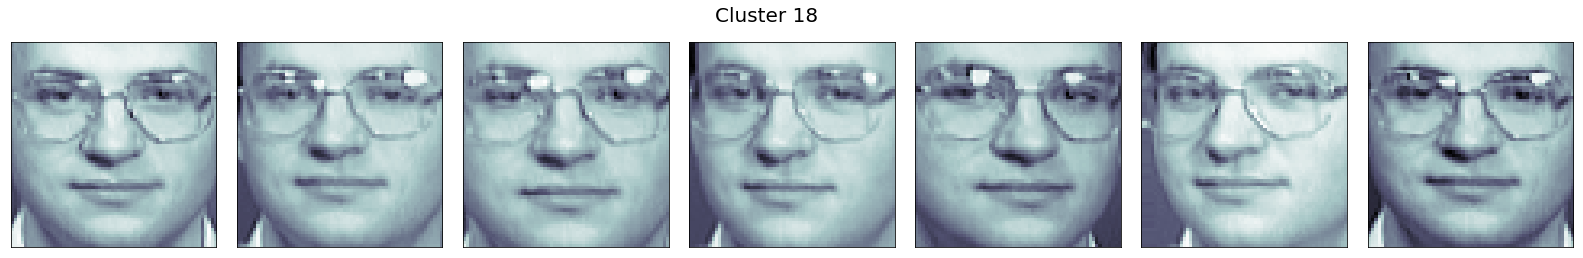

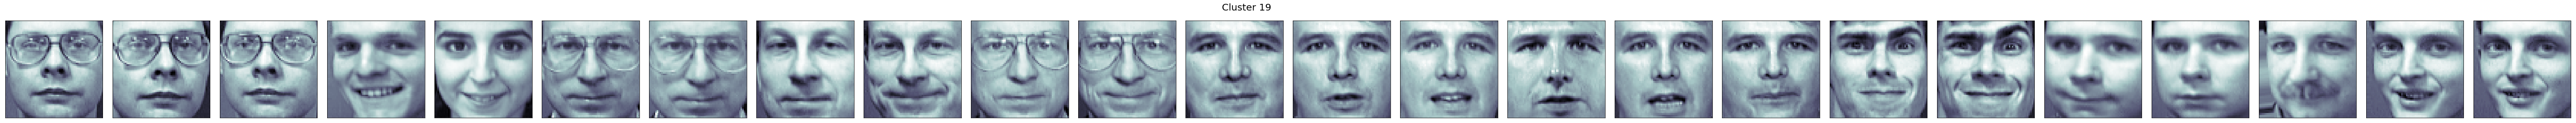

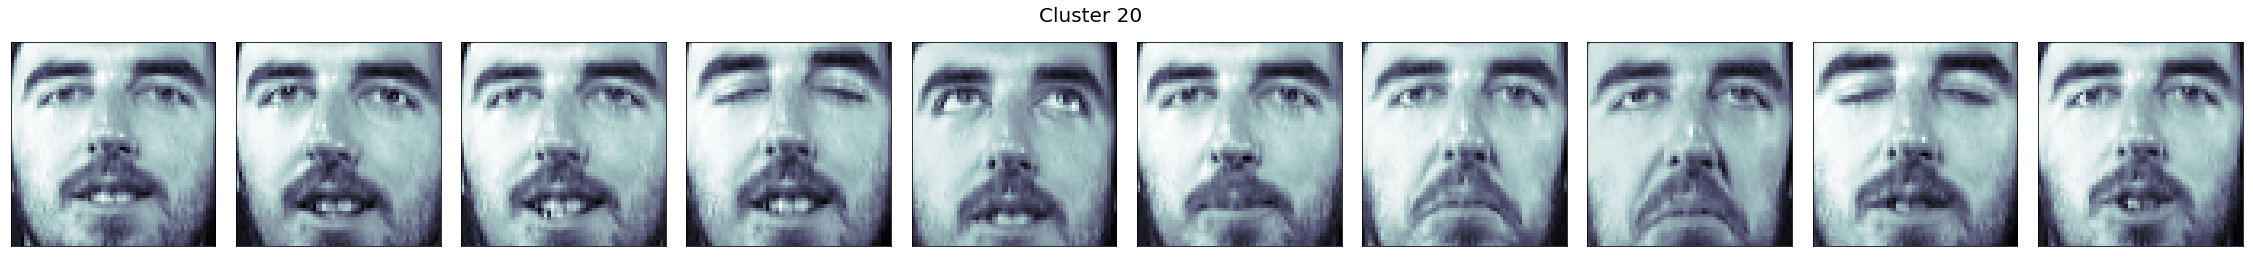

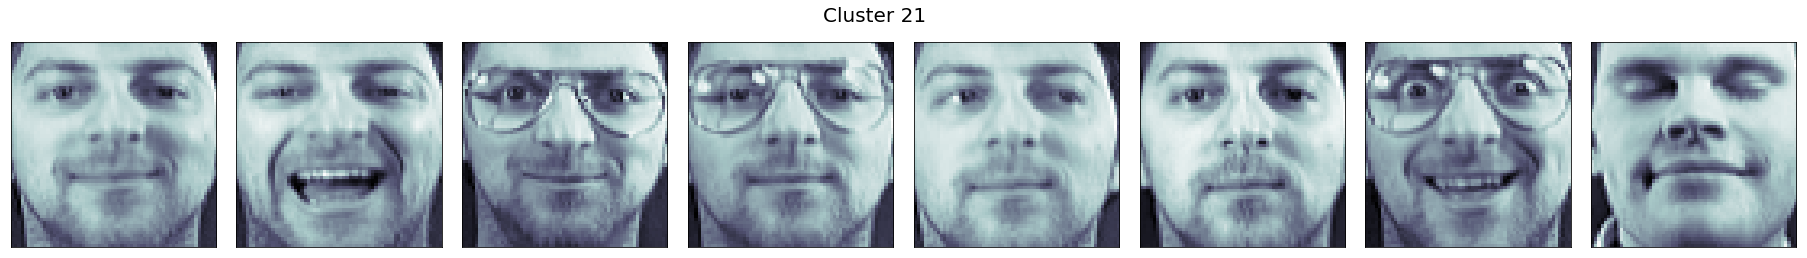

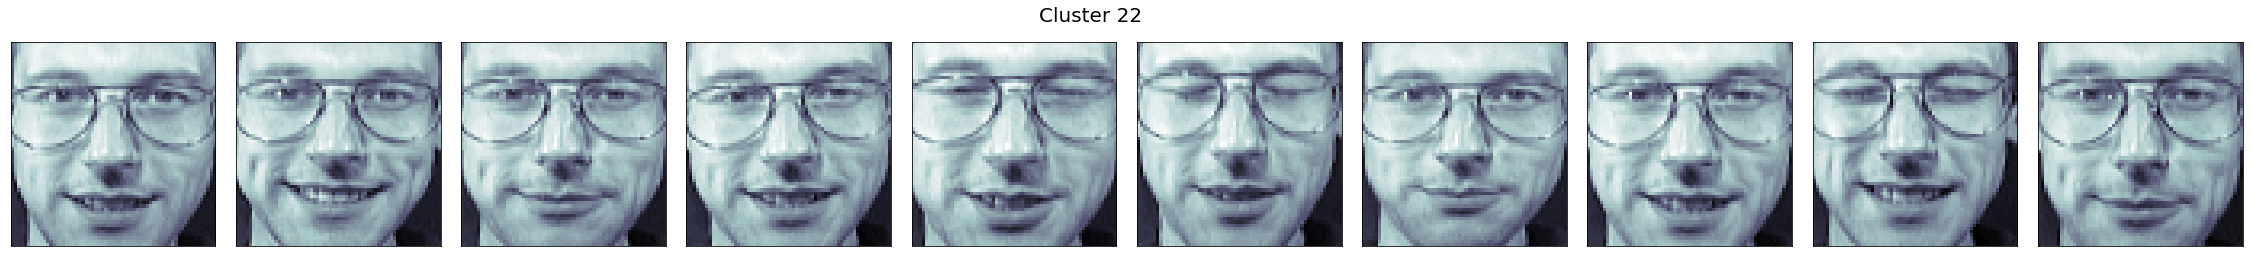

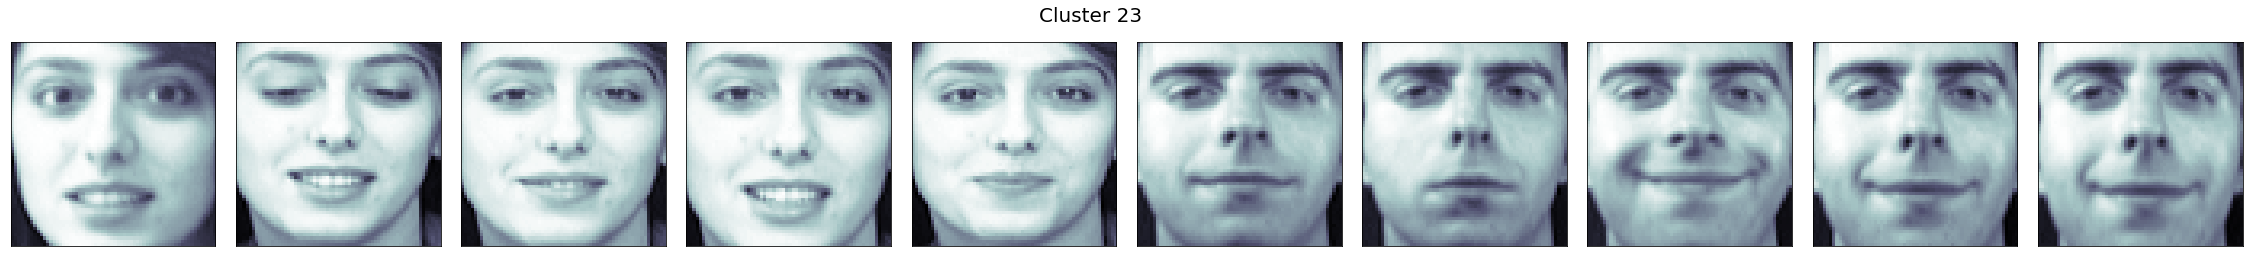

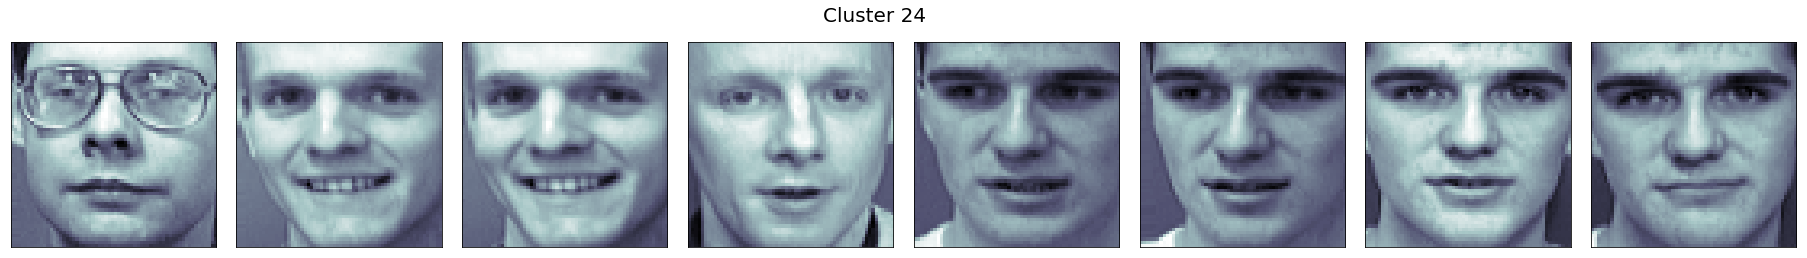

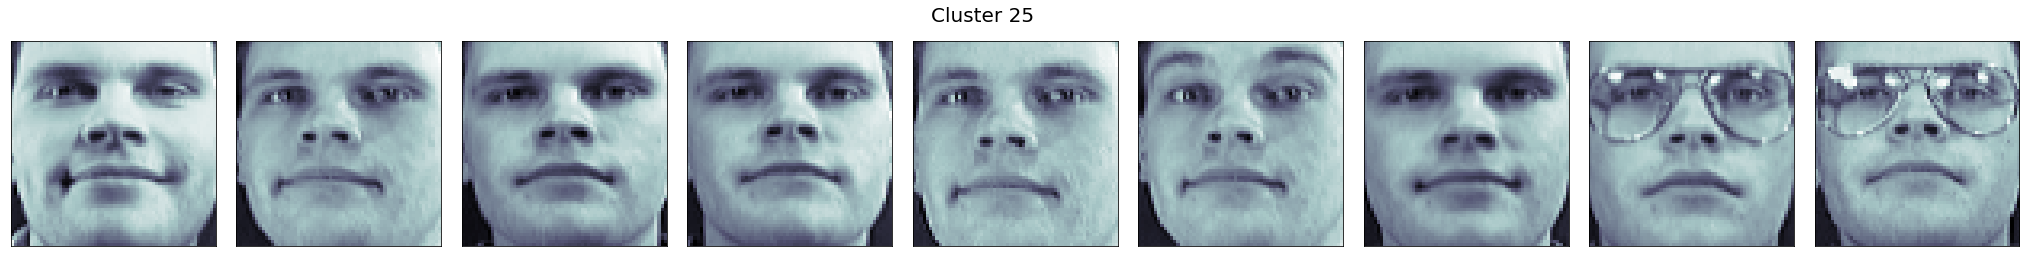

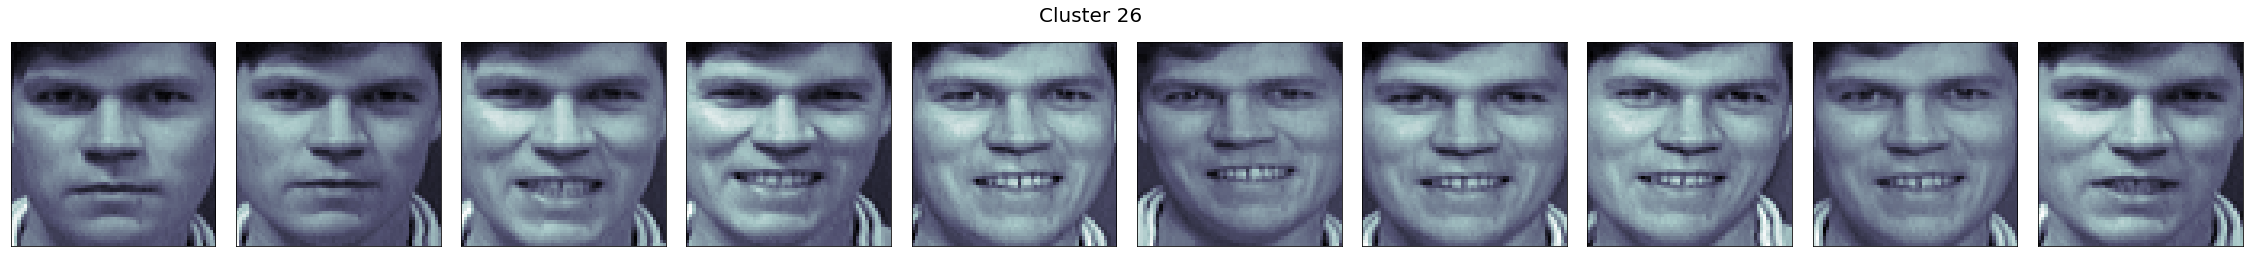

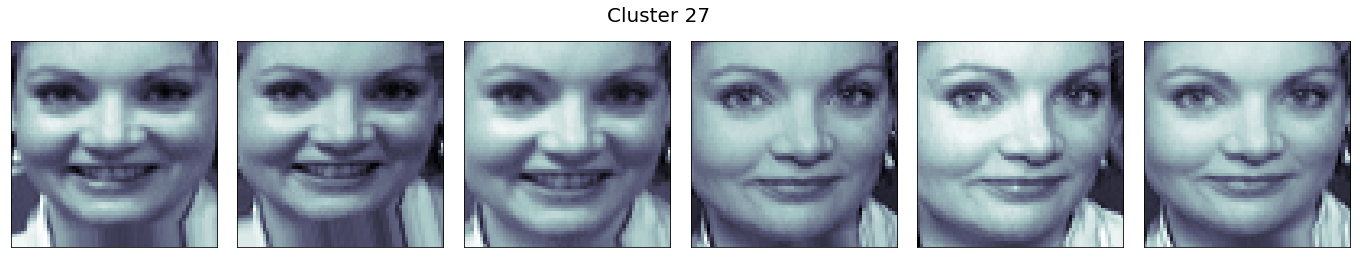

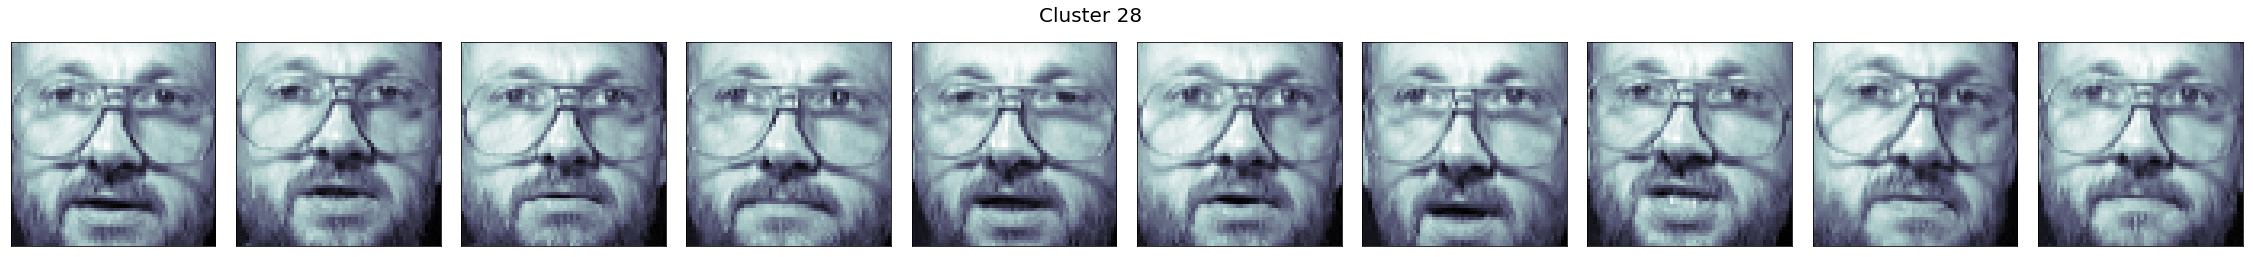

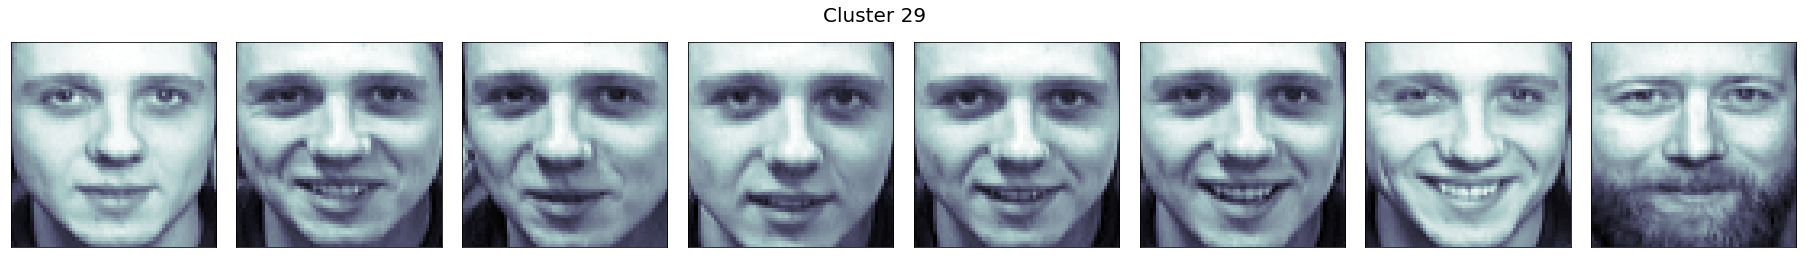

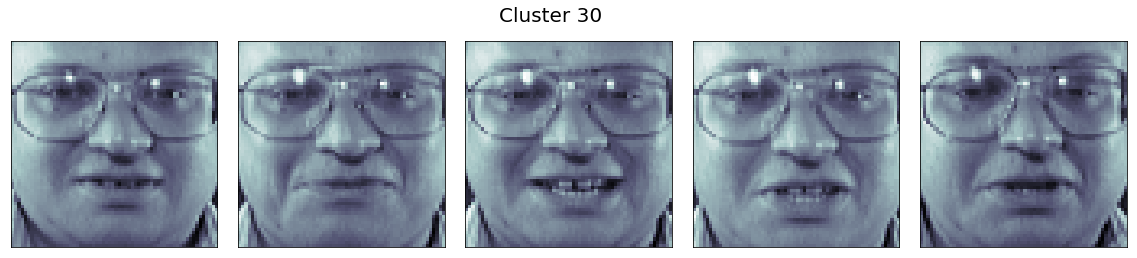

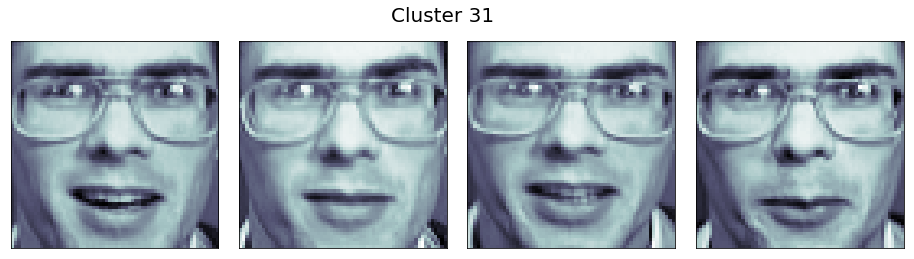

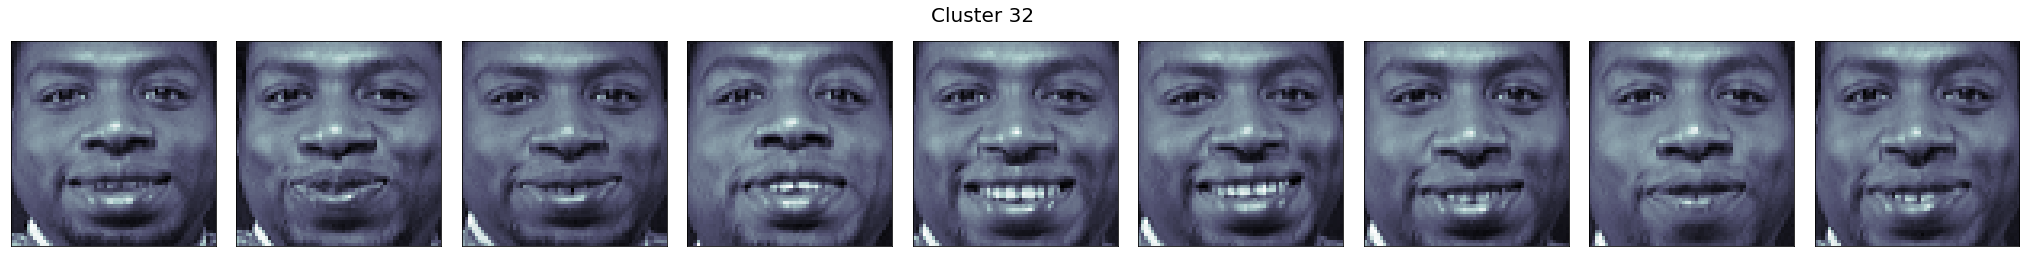

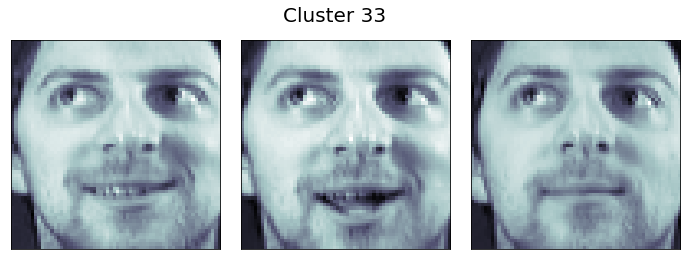

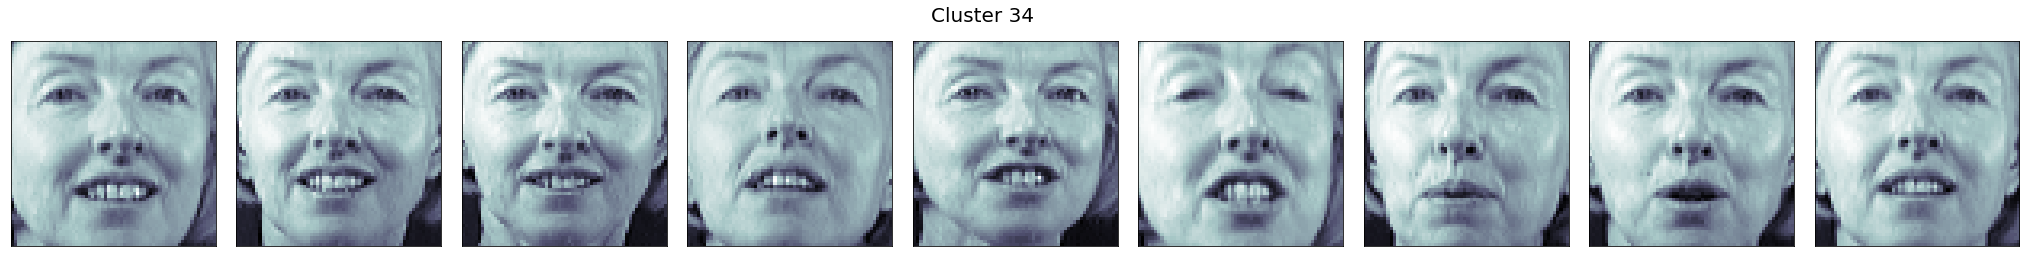

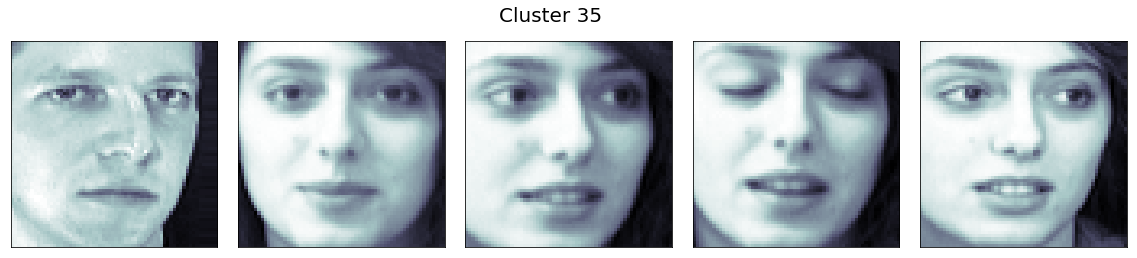

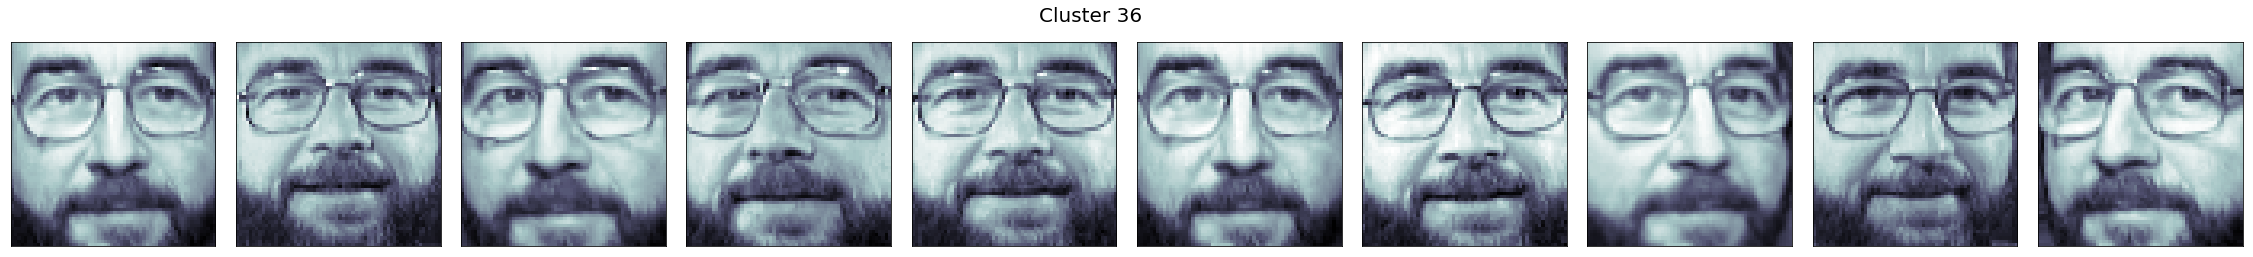

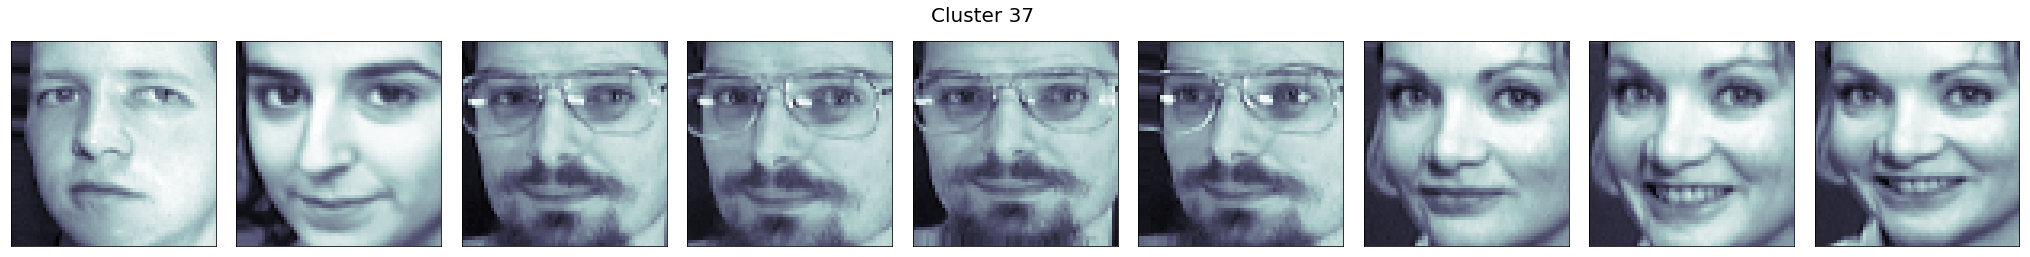

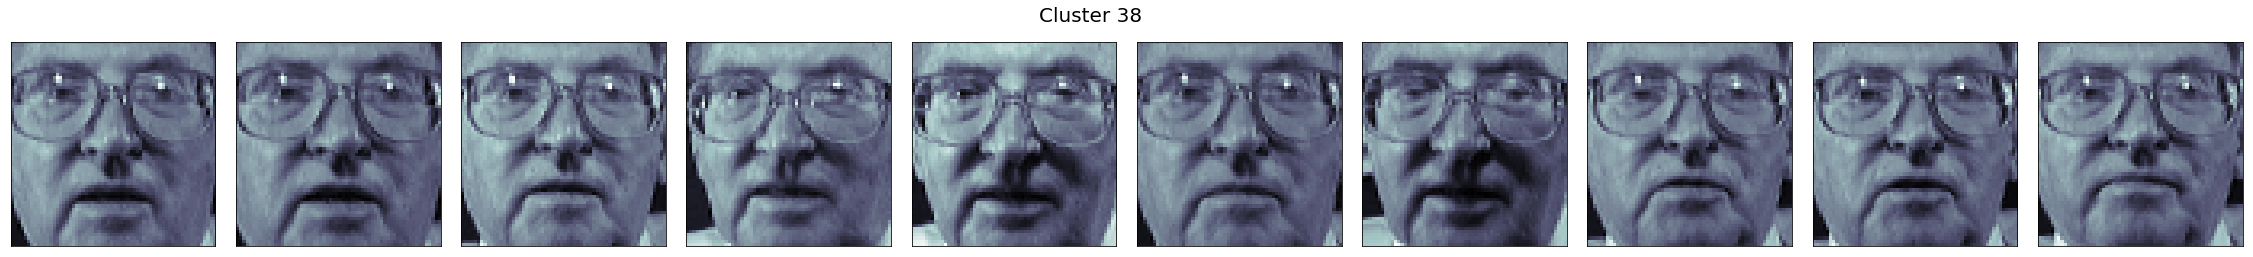

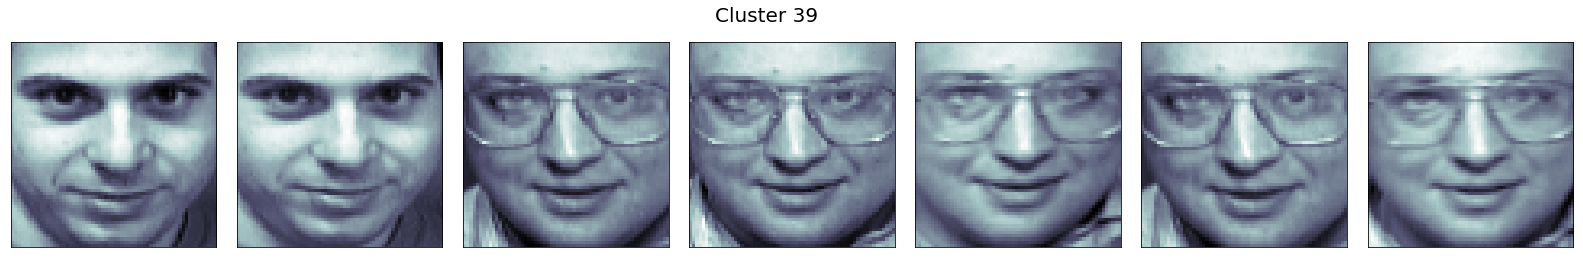

In [135]:
# Show the final results
for i in range(cluster_num):
    index = np.nonzero(labels==i)[0]
    num = len(index)
    this_faces = faces_image[index]
    fig, axes = plt.subplots(1, num, figsize=(4 * num, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(this_faces[i], cmap='bone')